# Stable Diffusion with 🤗 Diffusers

**Pedro Cuenca, Patrick von Platen, Suraj Patil, Jeremy Howard**

Chances are you'll have seen examples in Twitter (and elsewhere) of images generated by typing a short description of the scene you want to create. This is the culmination of years of work in generative models. This notebook introduces Stable Diffusion, the highest-quality open source text to image model as of now. It's also small enough to run in consumer GPUs rather than in a datacenter. We use the 🤗 Hugging Face [🧨 Diffusers library](https://github.com/huggingface/diffusers), which is currently our recommended library for using diffusion models.

As we'll see during the course, understanding state-of-the-art generative models requires a deep understanding of many of the fundamental blocks in modern machine learning models. This notebook shows what Stable Diffusion can do and a glimpse of its main components.

_If you open this notebook in Colab, or if you get type errors when generating your first image, please uncomment and run the following cell._

In [ ]:
# !pip install -Uq diffusers transformers fastcore

## Using Stable Diffusion

To run Stable Diffusion on your computer you have to accept the model license. It's an open CreativeML OpenRail-M license that claims no rights on the outputs you generate and prohibits you from deliberately producing illegal or harmful content. The [model card](https://huggingface.co/CompVis/stable-diffusion-v1-4) provides more details. If you do accept the license, you need to be a registered user in 🤗 Hugging Face Hub and use an access token for the code to work. You have two options to provide your access token:

* Use the `huggingface-cli login` command-line tool in your terminal and paste your token when prompted. It will be saved in a file in your computer.
* Or use `notebook_login()` in a notebook, which does the same thing.

In [ ]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

In [ ]:
torch.cuda.set_device(1)

### Stable Diffusion Pipeline

[`StableDiffusionPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion#diffusers.StableDiffusionPipeline) is an end-to-end [diffusion inference pipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion) that allows you to start generating images with just a few lines of code. Many Hugging Face libraries (along with other libraries such as scikit-learn) use the concept of a "pipeline" to indicate a sequence of steps that when combined complete some task. We'll look at the individual steps of the pipeline later -- for now though, let's just use it to see what it can do.

When we say "inference" we're referring to using an existing model to generate samples (in this case, images), as opposed to "training" (or fine-tuning) models using new data.

We use [`from_pretrained`](https://huggingface.co/docs/diffusers/main/en/api/diffusion_pipeline#diffusers.DiffusionPipeline.from_pretrained) to create the pipeline and download the pretrained weights. We indicate that we want to use the `fp16` (half-precision) version of the weights, and we tell `diffusers` to expect the weights in that format. This allows us to perform much faster inference with almost no discernible difference in quality. The string passed to `from_pretrained` in this case (`CompVis/stable-diffusion-v1-4`) is the repo id of a pretrained pipeline hosted on [Hugging Face Hub](https://huggingface.co/models); it can also be a path to a directory containing pipeline weights. The weights for all the models in the pipeline will be downloaded and cached the first time you run this cell.

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", revision="fp16", torch_dtype=torch.float16).to("cuda")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

The weights are cached in your home directory by default.

In [ ]:
!ls ~/.cache/huggingface/diffusers/

models--CompVis--stable-diffusion-v2-1
models--pcuenq--jh_dreambooth_1000
models--stabilityai--stable-diffusion-2-1


We are now ready to use the pipeline to start creating images.

If your GPU is not big enough to use `pipe`, run `pipe.enable_attention_slicing()`  
As described in the docs:  
> When this option is enabled, the attention module will split the input tensor in slices, to compute attention in several steps. This is useful to save some memory in exchange for a small speed decrease.

  0%|          | 0/50 [00:00<?, ?it/s]

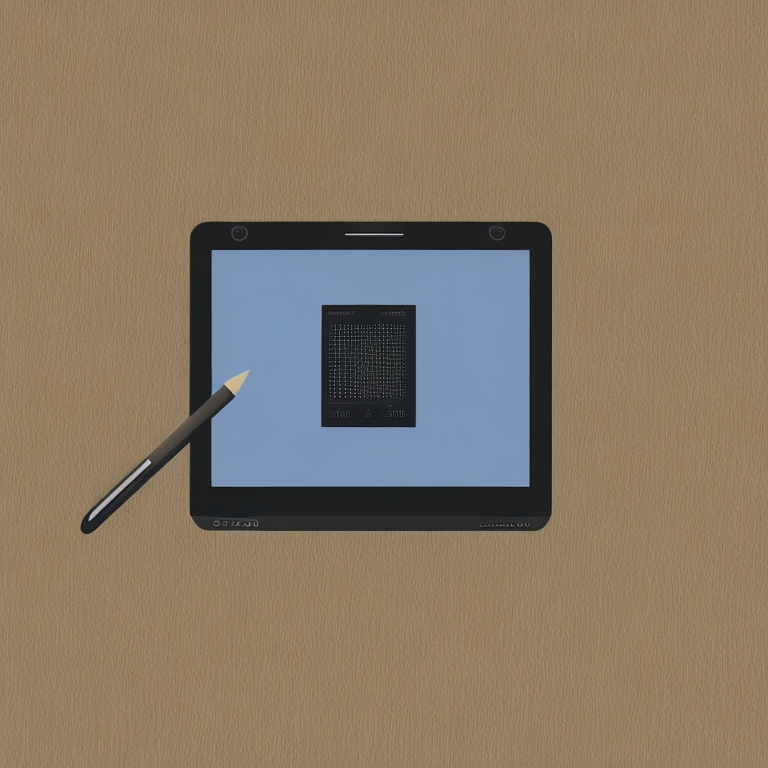

In [ ]:
#prompt = 'MRI machine icon illustration'
#prompt = 'Clean, sharp, vectorized icon of a black MRI scan machine with white background'#, modern and minimalist'
prompt = 'Illustration of a black Wacom drawing tablet placed on a stand, placed in the middle of the image'
#prompt = 'MRI machine scan device in hospital line black icon'
torch.manual_seed(45)
pipe(prompt, num_inference_steps=50).images[0]